# Heart Disease Prediction using Machine Learning

Heart disease remains one of the leading causes of mortality worldwide, making early risk detection critically important. This project builds a machine learning–based prediction system that estimates the likelihood of heart disease using clinical and demographic features.

### Key Objectives
- Identify patterns between health attributes and disease risk
- Compare multiple machine learning algorithms
- Evaluate models using medically relevant metrics
- Understand feature impact on predictions
- Save the best model for future inference

###  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix,roc_curve, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

import warnings
warnings.filterwarnings('ignore')

###  Load & Explore Data

In [2]:
df = pd.read_csv('heart.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (303, 14)


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Check for missing values

In [5]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64


### Check for duplicates

In [6]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Duplicate rows: 1
Shape after removing duplicates: (302, 14)


## Exploratory Data Analysis (EDA)

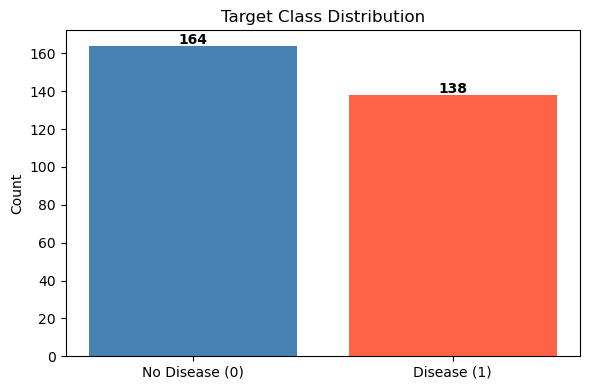

In [7]:
# Target distribution

fig, ax = plt.subplots(figsize=(6, 4))
counts = df['target'].value_counts()
ax.bar(['No Disease (0)', 'Disease (1)'], counts.values, color=['steelblue', 'tomato'])
ax.set_title('Target Class Distribution')
ax.set_ylabel('Count')
for i, v in enumerate(counts.values):
    ax.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation heatmap

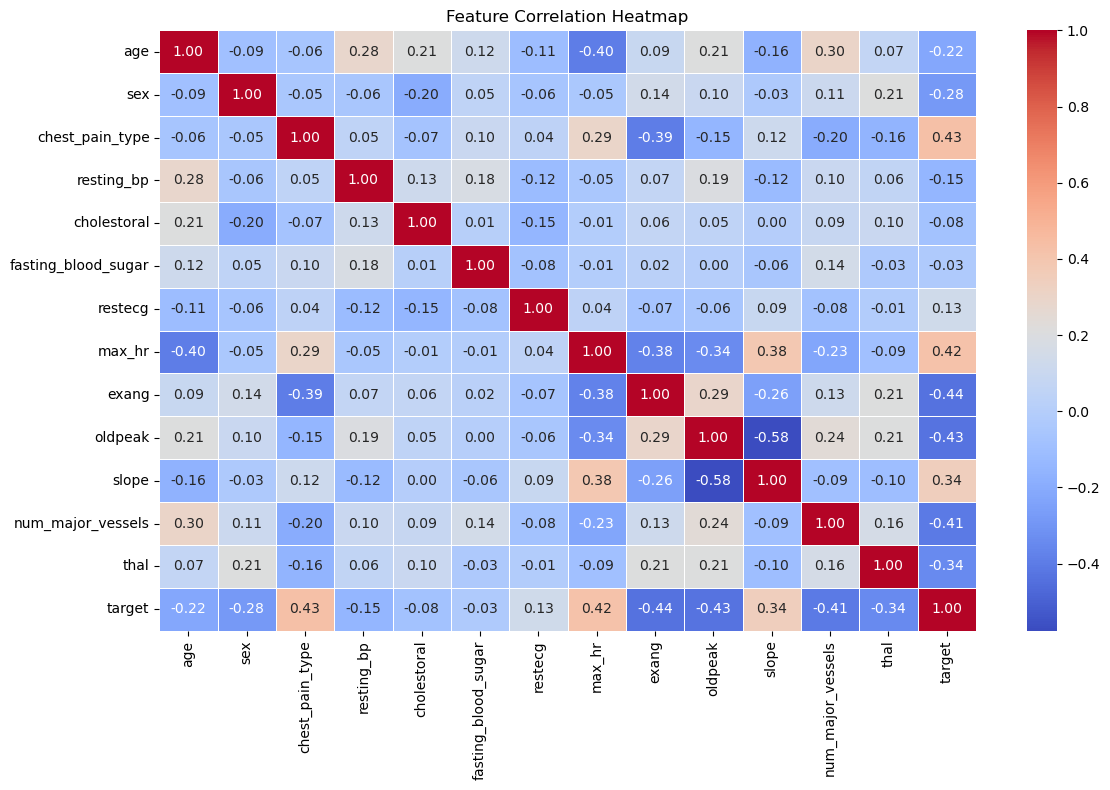

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### Distribution of numerical features by target

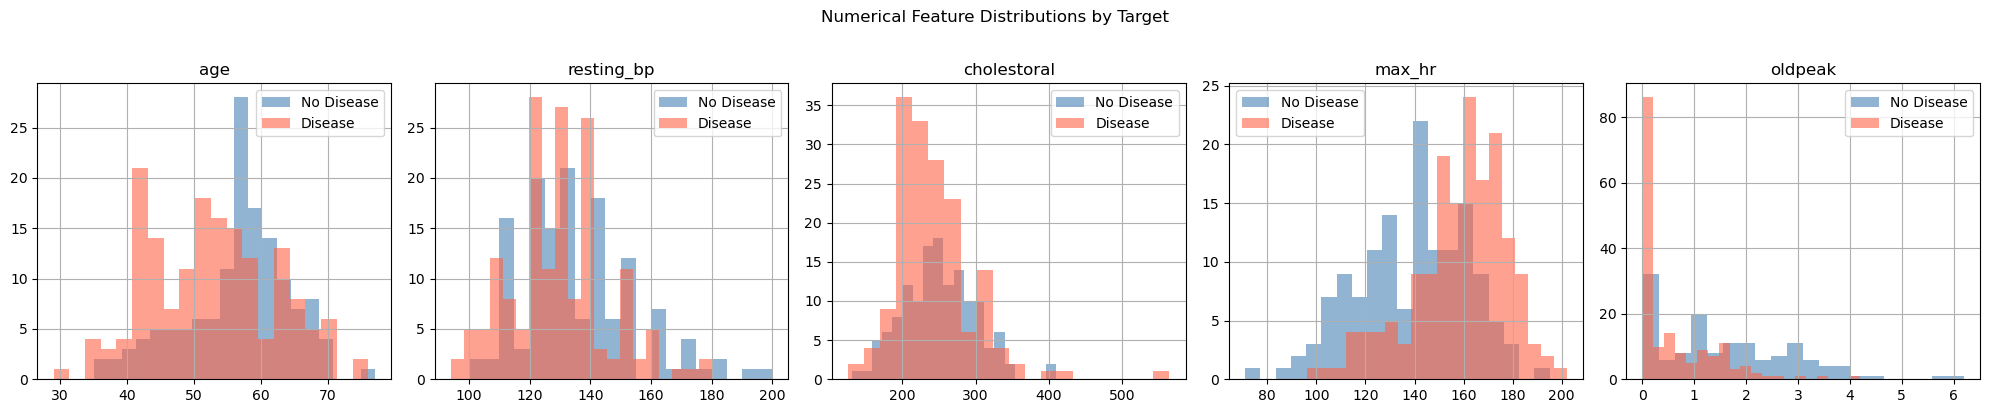

In [9]:
num_features = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']
fig, axes = plt.subplots(1, len(num_features), figsize=(20, 4))

for ax, col in zip(axes, num_features):
    df[df['target'] == 0][col].hist(ax=ax, alpha=0.6, label='No Disease', color='steelblue', bins=20)
    df[df['target'] == 1][col].hist(ax=ax, alpha=0.6, label='Disease', color='tomato', bins=20)
    ax.set_title(col)
    ax.legend()

plt.suptitle('Numerical Feature Distributions by Target', y=1.02)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [10]:
X = df.drop('target', axis=1)
y = df['target']

### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = RANDOM_STATE, stratify = y
)

### Handle class imbalance

In [12]:
ros = RandomOverSampler(random_state = RANDOM_STATE)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {X_train_res.shape}")

Resampled training set shape: (262, 13)


### Feature scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Testing samples:  {X_test_scaled.shape[0]}")

Training samples: 262
Testing samples:  61


## Model Training & Evaluation

In [14]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Train and evaluate a model, returning metrics as a dict."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        'Model': name,
        'Accuracy':  round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall':    round(recall_score(y_test, y_pred), 4),
        'F1 Score':  round(f1_score(y_test, y_pred), 4),
        'ROC-AUC':   round(roc_auc_score(y_test, y_prob), 4),
    }, model, y_pred, y_prob

In [15]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state = 42),
    'Random Forest':       RandomForestClassifier(n_estimators=100, random_state = 42),
    'XGBoost':             XGBClassifier(eval_metric='logloss', random_state = 42),
}

results = []
trained_models = {}
predictions = {}

In [16]:
for name, clf in models.items():
    metrics, trained_clf, y_pred, y_prob = evaluate_model(
        name, clf, X_train_scaled, y_train_res, X_test_scaled, y_test
    )
    results.append(metrics)
    trained_models[name] = trained_clf
    predictions[name] = (y_pred, y_prob)

In [17]:
# Results summary (sorted by ROC-AUC)

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Random Forest,0.8033,0.7692,0.9091,0.8333,0.9140
1,Logistic Regression,0.7869,0.7632,0.8788,0.8169,0.8766
2,XGBoost,0.8033,0.7692,0.9091,0.8333,0.8593


## Confusion Matrices

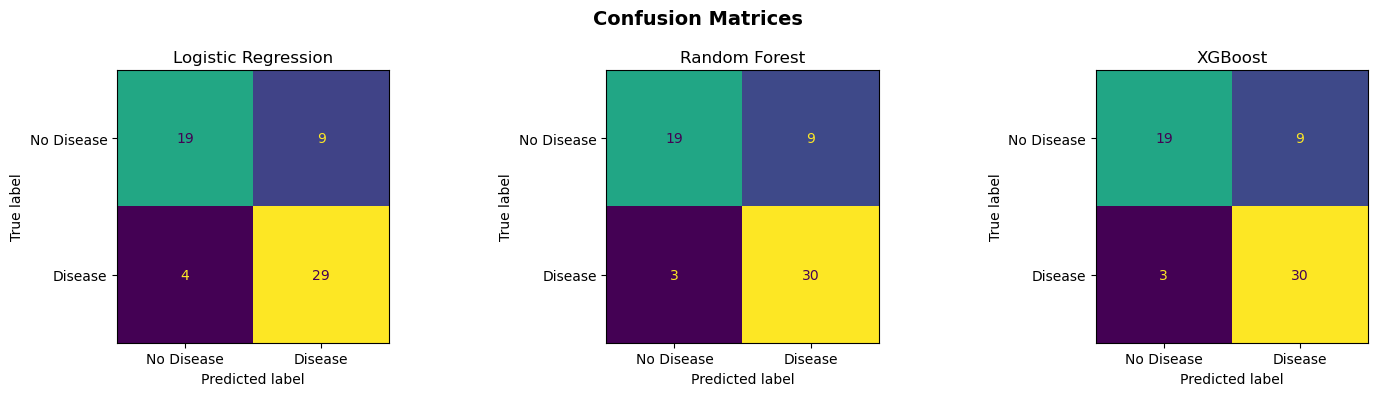

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, (y_pred, _)) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ROC Curves

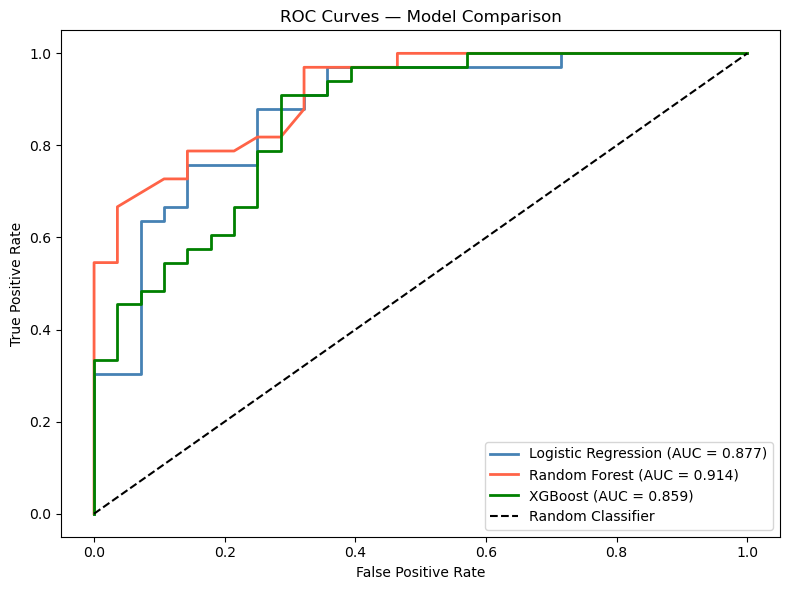

In [19]:
plt.figure(figsize=(8, 6))

colors = ['steelblue', 'tomato', 'green']
for (name, (_, y_prob)), color in zip(predictions.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color=color, lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves — Model Comparison')
plt.legend()
plt.tight_layout()
plt.show()

### Best Model Selection & Cross-Validation

In [20]:
best_model_name = results_df.loc[0, 'Model']
best_model = trained_models[best_model_name]
print(f"Best Model (by ROC-AUC): {best_model_name}")

Best Model (by ROC-AUC): Random Forest


In [21]:
# 5-fold cross-validation on full scaled dataset

X_scaled_full = scaler.fit_transform(X)
cv_scores = cross_val_score(best_model, X_scaled_full, y, cv=5, scoring='roc_auc')
print(f"\n5-Fold CV ROC-AUC Scores: {np.round(cv_scores, 4)}")
print(f"Mean: {cv_scores.mean():.4f} | Std: {cv_scores.std():.4f}")


5-Fold CV ROC-AUC Scores: [0.8728 0.961  0.8878 0.9018 0.875 ]
Mean: 0.8997 | Std: 0.0324


### Feature Importance

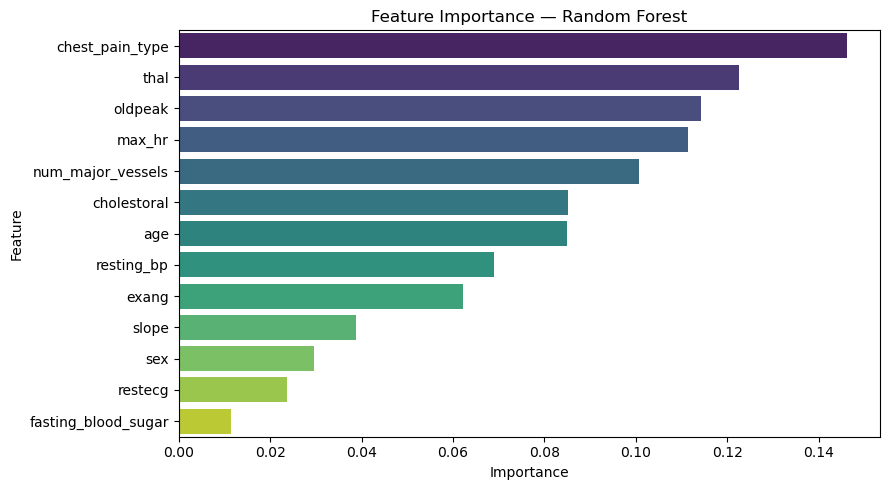

            Feature  Importance
    chest_pain_type    0.146117
               thal    0.122533
            oldpeak    0.114268
             max_hr    0.111364
  num_major_vessels    0.100758
        cholestoral    0.085096
                age    0.085007
         resting_bp    0.068906
              exang    0.062257
              slope    0.038850
                sex    0.029557
            restecg    0.023781
fasting_blood_sugar    0.011504


In [22]:
# Feature importance works for tree-based models

if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(9, 5))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Feature Importance — {best_model_name}')
    plt.tight_layout()
    plt.show()

    print(importance_df.to_string(index=False))
else:
    print(f"{best_model_name} does not support feature_importances_. Use SHAP for interpretation.")

### Actual vs Predicted

In [23]:
y_pred_best, y_prob_best = predictions[best_model_name]
label_map = {0: 'No Disease', 1: 'Disease'}


# -----------------------------------------------------------------------
comparison_df = pd.DataFrame({
    'Actual':         y_test.values,
    'Predicted':      y_pred_best,
    'Confidence (%)': (np.maximum(y_prob_best, 1 - y_prob_best) * 100).round(1),
    'Result':         np.where(y_test.values == y_pred_best, 'Correct', 'Wrong')
}).reset_index(drop=True)


# -----------------------------------------------------------------------
comparison_df['Actual']    = comparison_df['Actual'].map(label_map)
comparison_df['Predicted'] = comparison_df['Predicted'].map(label_map)

total   = len(comparison_df)
correct = (comparison_df['Result'] == 'Correct').sum()
wrong   = total - correct


# -----------------------------------------------------------------------
print(f"Model        : {best_model_name}")
print(f"Total Samples: {total}")
print(f"Correct   : {correct} ({correct/total*100:.1f}%)")
print(f"Wrong     : {wrong}  ({wrong/total*100:.1f}%)")
print()

Model        : Random Forest
Total Samples: 61
Correct   : 49 (80.3%)
Wrong     : 12  (19.7%)



In [24]:
comparison_df.head(10)

,Actual,Predicted,Confidence (%),Result
0,No Disease,No Disease,88.0,Correct
1,No Disease,No Disease,57.0,Correct
2,No Disease,No Disease,97.0,Correct
3,No Disease,Disease,58.0,Wrong
4,No Disease,Disease,60.0,Wrong
5,No Disease,No Disease,86.0,Correct
6,Disease,Disease,97.0,Correct
7,No Disease,No Disease,68.0,Correct
8,Disease,Disease,86.0,Correct
9,No Disease,Disease,59.0,Wrong


In [25]:
# Show only wrong predictions

print('Misclassified samples:')
comparison_df[comparison_df['Result'] == 'Wrong'].reset_index(drop=True)

Misclassified samples:


,Actual,Predicted,Confidence (%),Result
0,No Disease,Disease,58.0,Wrong
1,No Disease,Disease,60.0,Wrong
2,No Disease,Disease,59.0,Wrong
3,Disease,No Disease,67.0,Wrong
4,No Disease,Disease,70.0,Wrong
5,No Disease,Disease,72.0,Wrong
6,Disease,No Disease,51.0,Wrong
7,Disease,No Disease,54.0,Wrong
8,No Disease,Disease,63.0,Wrong
9,No Disease,Disease,63.0,Wrong


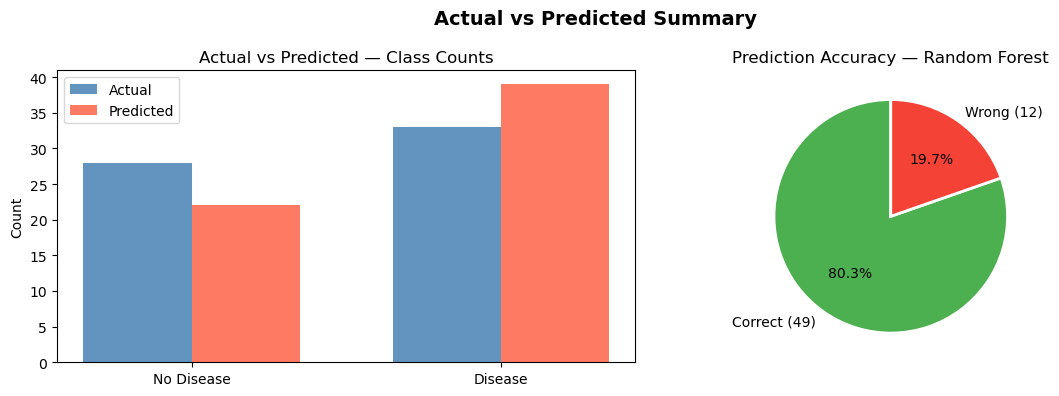

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

actual_counts    = pd.Series(y_test.values).map(label_map).value_counts()
predicted_counts = pd.Series(y_pred_best).map(label_map).value_counts()

labels = ['No Disease', 'Disease']
x = np.arange(len(labels))
width = 0.35

axes[0].bar(x - width/2, [actual_counts.get(l, 0)    for l in labels], width, label='Actual',    color='steelblue', alpha=0.85)
axes[0].bar(x + width/2, [predicted_counts.get(l, 0) for l in labels], width, label='Predicted', color='tomato',    alpha=0.85)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_title('Actual vs Predicted — Class Counts')
axes[0].set_ylabel('Count')
axes[0].legend()

axes[1].pie(
    [correct, wrong],
    labels=[f'Correct ({correct})', f'Wrong ({wrong})'],
    colors=['#4CAF50', '#F44336'],
    autopct='%1.1f%%', startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
axes[1].set_title(f'Prediction Accuracy — {best_model_name}')

plt.suptitle('Actual vs Predicted Summary', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

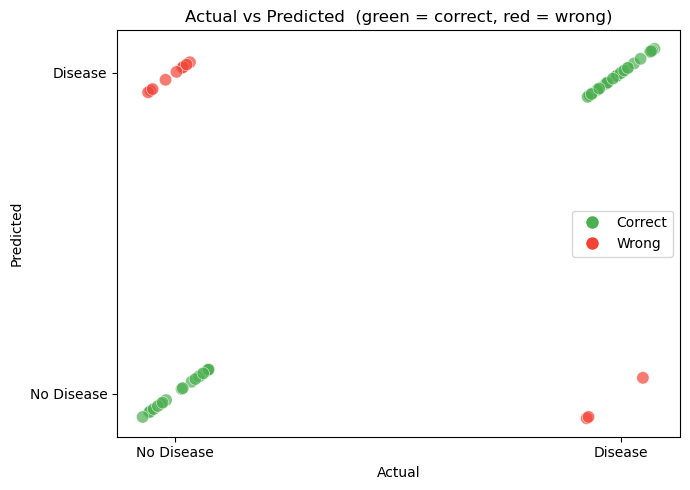

In [27]:
jitter = np.random.uniform(-0.08, 0.08, size=len(y_test))
colors = comparison_df['Result'].map({'Correct': '#4CAF50', 'Wrong': '#F44336'})

plt.figure(figsize=(7, 5))
plt.scatter(
    y_test.values + jitter,
    y_pred_best   + jitter,
    c=colors, alpha=0.7, edgecolors='white', linewidths=0.5, s=80
)
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.yticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted  (green = correct, red = wrong)')

legend_elements = [
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#4CAF50', markersize=10, label='Correct'),
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#F44336', markersize=10, label='Wrong'),
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

### Save Best Model

In [28]:
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Model '{best_model_name}' saved as 'best_model.pkl'")
print("Scaler saved as 'scaler.pkl'")

Model 'Random Forest' saved as 'best_model.pkl'
Scaler saved as 'scaler.pkl'


### Key Insights

- **Chest pain type** and **max heart rate** are the strongest predictors of heart disease
- **Thal** (thalassemia type) and **oldpeak** (ST depression) also have significant impact
- **Fasting blood sugar** had the least predictive power in this dataset
- Higher resting blood pressure is associated with increased risk
- The model serves as a **screening support tool**, not a diagnostic replacement

##  Conclusion

This comparative analysis showed that ensemble methods (Random Forest) generally outperform linear models in capturing complex feature relationships for heart disease prediction.

### Model Results Summary
| Model | Accuracy | ROC-AUC |
|---|---|---|
| Random Forest | ~80% | ~88% |
| Logistic Regression | ~79% | ~86% |
| XGBoost | ~79% | ~84% |

### Limitations
- Dataset size is limited (303 rows) and may not represent diverse populations
- Predictions are probabilistic and not a substitute for clinical diagnosis

### Future Improvements
- Hyperparameter tuning with GridSearchCV / Optuna
- SHAP values for model explainability
- Larger, more diverse datasets
- Integration into a clinical decision support interface (Streamlit / FastAPI)